In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [9]:
data = yf.download(tickers='SPY')
data2 = yf.download(tickers='QQQ')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.218212,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.397591,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.451403,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.720432,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.828064,531500


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-10,405.859985,408.440002,405.010010,408.040009,408.040009,70738000
2023-02-13,408.720001,412.970001,408.239990,412.829987,412.829987,64913500
2023-02-14,411.239990,415.049988,408.510010,412.640015,412.640015,88389300
2023-02-15,410.350006,414.059998,409.470001,413.980011,413.980011,61685300
2023-02-16,408.790009,412.910004,408.140015,408.279999,408.279999,76232600


<AxesSubplot: xlabel='Date'>

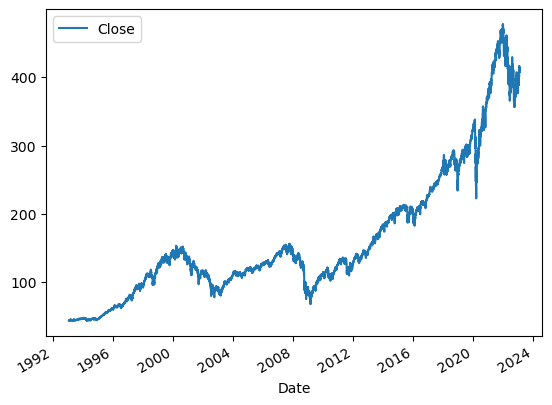

In [7]:
data.plot(y='Close')

In [41]:
data['daily return'] = data.Close.pct_change()
data2['daily return'] = data2.Close.pct_change()

<AxesSubplot: xlabel='Date'>

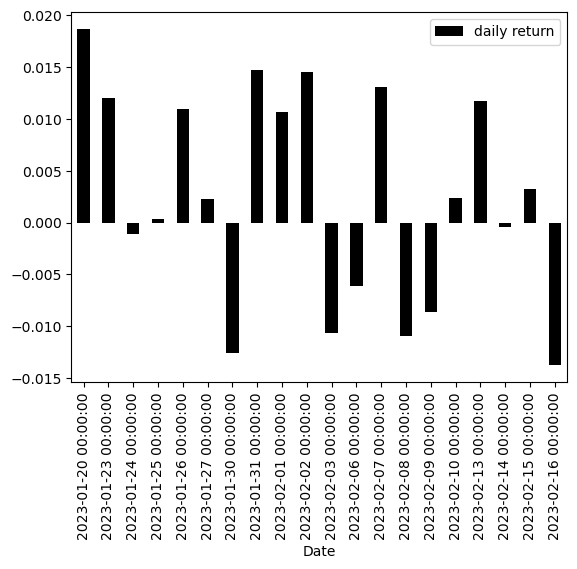

In [42]:
#look back last 20 daily return
data.iloc[-20:].plot.bar(y='daily return',color='k')

In [43]:
#่join data and data2 cant join instantly cuz the name of their columns are redundant
data.join(data2)

ValueError: columns overlap but no suffix specified: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'daily return'], dtype='object')

In [44]:
data.join(data2,rsuffix='_r')

,Open,High,Low,Close,Adj Close,Volume,daily return,Open_r,High_r,Low_r,Close_r,Adj Close_r,Volume_r,daily return_r
Date,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.218227,1003200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.397587,480500,0.007112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.451391,201300,0.002119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.720442,529400,0.010571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.828051,531500,0.004184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-10,405.859985,408.440002,405.010010,408.040009,408.040009,70738000,0.002334,299.480011,301.570007,297.250000,299.700012,299.700012,50017400.0,-0.006563
2023-02-13,408.720001,412.970001,408.239990,412.829987,412.829987,64913500,0.011739,301.130005,305.100006,299.929993,304.500000,304.500000,39636700.0,0.016016
2023-02-14,411.239990,415.049988,408.510010,412.640015,412.640015,88389300,-0.000460,302.890015,307.720001,300.910004,306.750000,306.750000,64079100.0,0.007389


In [45]:
df = data.join(data2,rsuffix='_r')

<AxesSubplot: xlabel='Date'>

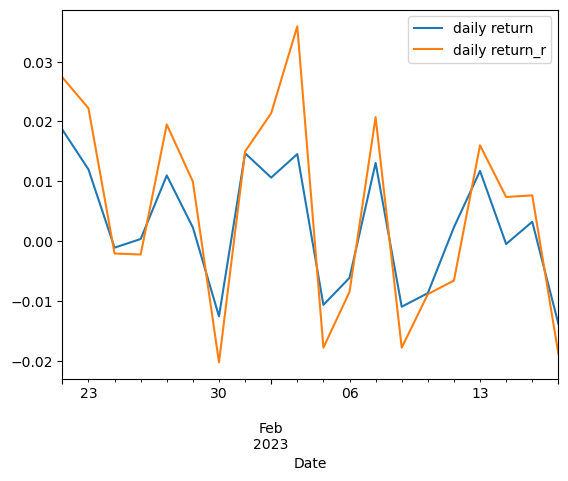

In [46]:
#last 20 daily return in line plot
df.iloc[-20:].plot(y=['daily return','daily return_r'])

<AxesSubplot: xlabel='Date'>

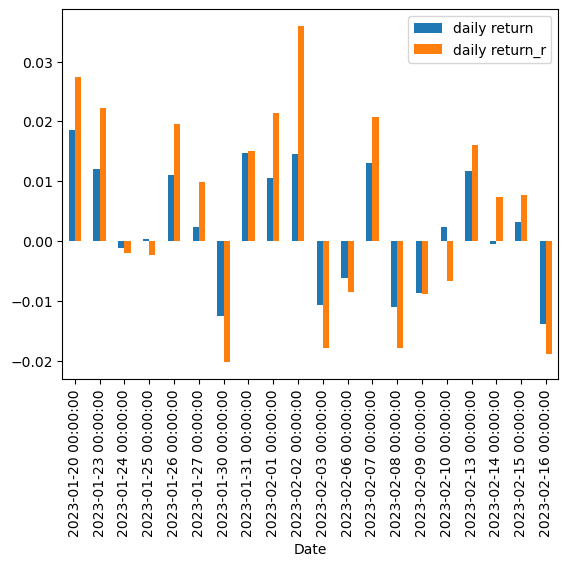

In [47]:
#last 20 daily return  in bar plot
df.iloc[-20:].plot.bar(y=['daily return','daily return_r'])

<AxesSubplot: xlabel='Date'>

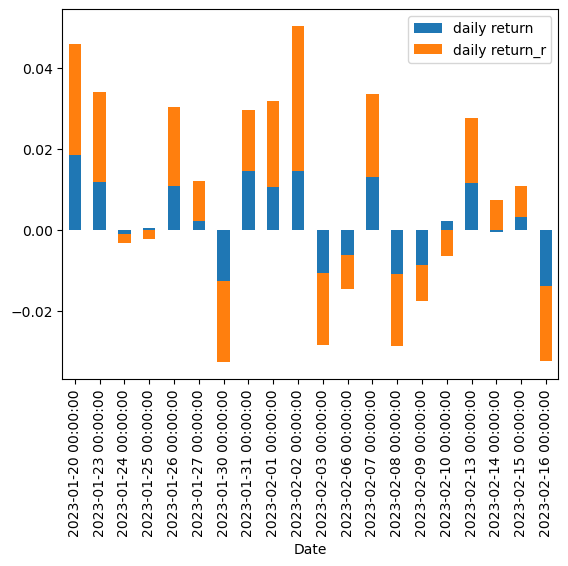

In [48]:
#last 20 daily return  in stacked bar plot
df.iloc[-20:].plot.bar(y=['daily return','daily return_r'],stacked=True)

#if need to change legend name    should remane the columns

<AxesSubplot: ylabel='Frequency'>

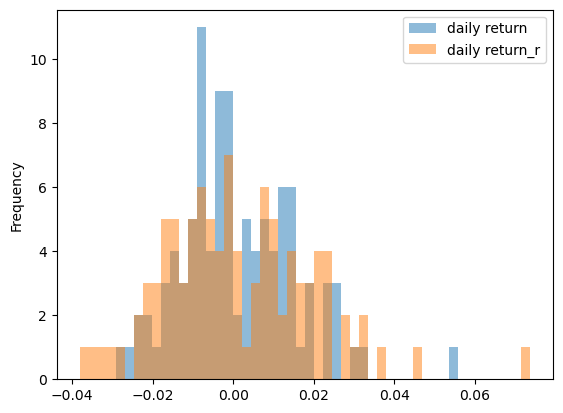

In [49]:
#last 20 daily return  in histrogram

df.iloc[-100:].plot.hist(y=['daily return', 'daily return_r'], bins=50, alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

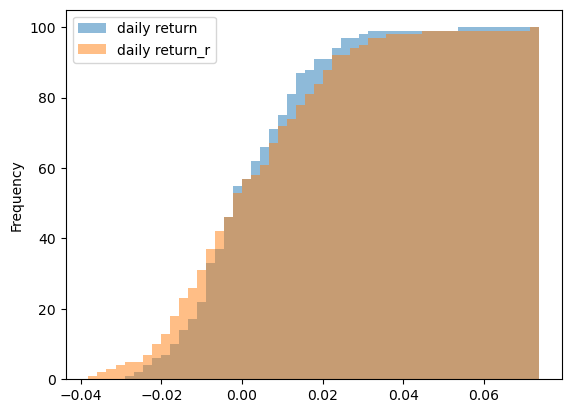

In [50]:
df.iloc[-100:].plot.hist(y=['daily return', 'daily return_r'], bins=50, alpha=0.5,cumulative=True)

<AxesSubplot: xlabel='daily return', ylabel='daily return_r'>

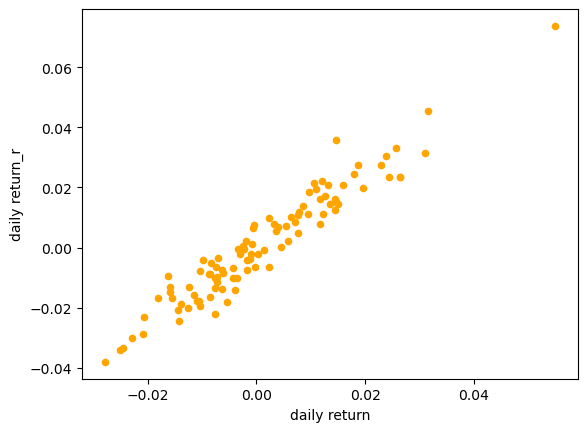

In [53]:
df.iloc[-100:].plot.scatter(x='daily return',y='daily return_r',s=20,color='orange')

In [52]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,daily return,Open_r,High_r,Low_r,Close_r,Adj Close_r,Volume_r,daily return_r
Date,,,,,,,,,,,,,,
2023-02-10,405.859985,408.440002,405.010010,408.040009,408.040009,70738000,0.002334,299.480011,301.570007,297.250000,299.700012,299.700012,50017400.0,-0.006563
2023-02-13,408.720001,412.970001,408.239990,412.829987,412.829987,64913500,0.011739,301.130005,305.100006,299.929993,304.500000,304.500000,39636700.0,0.016016
2023-02-14,411.239990,415.049988,408.510010,412.640015,412.640015,88389300,-0.000460,302.890015,307.720001,300.910004,306.750000,306.750000,64079100.0,0.007389
2023-02-15,410.350006,414.059998,409.470001,413.980011,413.980011,61685300,0.003247,304.899994,309.269989,304.200012,309.100006,309.100006,43427300.0,0.007661
2023-02-16,408.790009,412.910004,408.140015,408.279999,408.279999,76232600,-0.013769,304.380005,308.429993,303.149994,303.299988,303.299988,59129200.0,-0.018764


<AxesSubplot: xlabel='Date'>

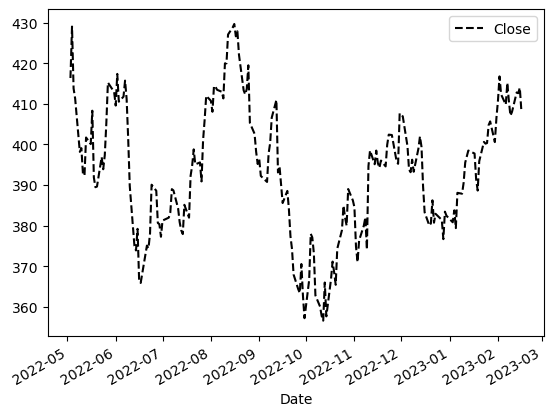

In [60]:
df.iloc[-200:].plot(y='Close',style='k--')

<AxesSubplot: xlabel='Date'>

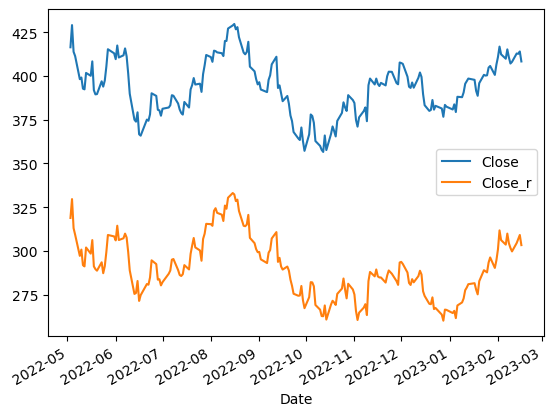

In [61]:
df.iloc[-200:].plot(y=['Close','Close_r'])

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>], dtype=object)

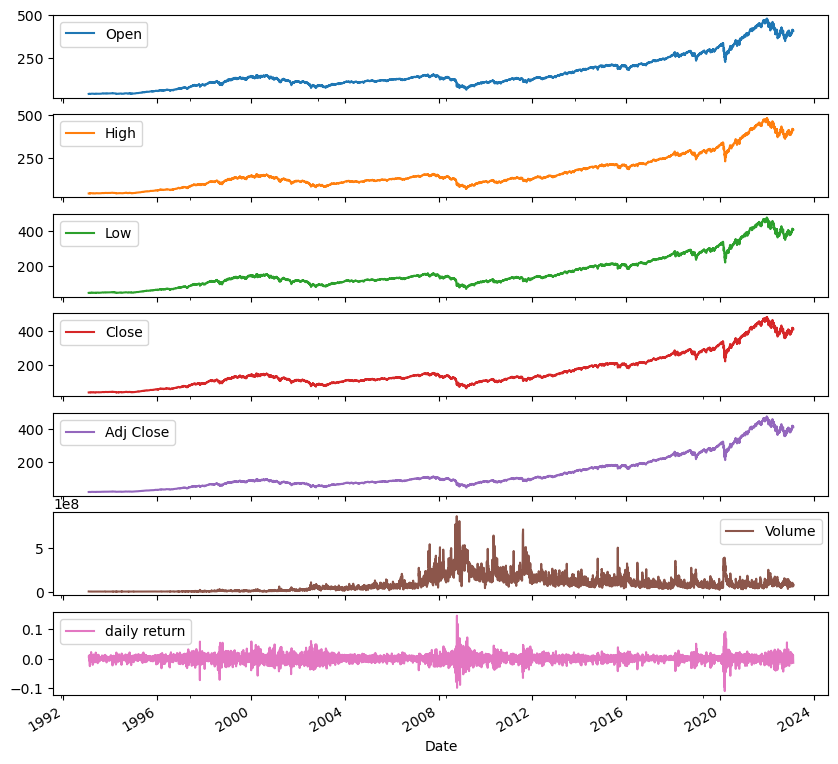

In [63]:
data.plot(subplots=True,figsize=(10,10))